In [ ]:
# para crear el venv
# python3 -m venv .venv
# source .venv/bin/activate
# pip install -r requirements.txt

# Luego .venv\Scripts\activate en la carpeta venv del git, luego hacer un pip install
# antes hacer conda deactivate para quitar (base)

# pip freeze > requirements.txt




import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir ruta y nombre del archivo
ruta_datos = "C:\\Users\\pablo\\Git\\uniovi-simur-datos\\PMP1047"
archivo = "data_tot_features.npz"

# Unir la ruta completa del archivo
ruta_completa = os.path.join(ruta_datos, archivo)


data = np.load(ruta_completa)

# Ver las claves almacenadas en el archivo
print("Claves disponibles en el archivo .npz:", data.files)

X = data['arr_0']
y_Actividades = data['arr_1']

print(X.shape)

Claves disponibles en el archivo .npz: ['arr_0', 'arr_1']
(61334, 91)


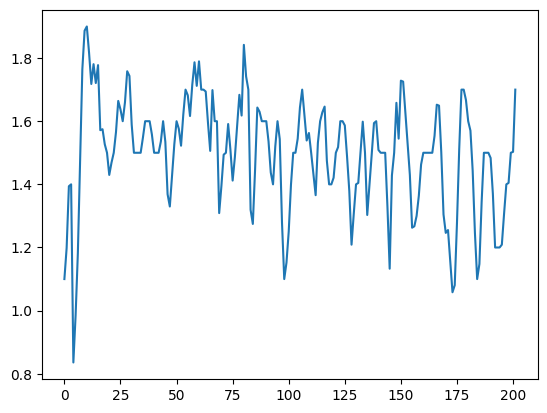

In [4]:
ruta_excel_FASE_REPOSO_CON_K5 = r'C:\Users\pablo\Git\uniovi-simur-datos\PMP1047\PMP1047_REPOSO_20241108(CPET Cámara de Mezcla).xlsx'

excel_FASE_REPOSO_CON_K5 = pd.read_excel(ruta_excel_FASE_REPOSO_CON_K5, engine='openpyxl')
excel_METS_FASE_REPOSO_CON_K5 = pd.to_numeric(excel_FASE_REPOSO_CON_K5['METS'][2:], errors='coerce')

indices_reposo = np.where(y_Actividades == 'FASE REPOSO CON K5')[0]
num_reposo = len(indices_reposo)

METS_FASE_REPOSO_CON_K5 = np.interp(np.linspace(0, len(excel_METS_FASE_REPOSO_CON_K5) - 1, num_reposo),
                                    np.arange(len(excel_METS_FASE_REPOSO_CON_K5)),
                                    excel_METS_FASE_REPOSO_CON_K5)

plt.plot(METS_FASE_REPOSO_CON_K5)

In [9]:
def columna_excel(string_columna, Actividades, path_excel_FASE_REPOSO_CON_K5, path_excel_TAPIZ_RODANTE, path_excel_SIT_TO_STAND_30_s, path_excel_INCREMENTAL_CICLOERGOMETRO):
    
    # Reposo con K5
    excel_FASE_REPOSO_CON_K5 = pd.read_excel(path_excel_FASE_REPOSO_CON_K5, engine='openpyxl')
    excel_METS_FASE_REPOSO_CON_K5 = pd.to_numeric(excel_FASE_REPOSO_CON_K5[string_columna][2:], errors='coerce')

    indices_reposo = np.where(Actividades == 'FASE REPOSO CON K5')[0]
    num_reposo = len(indices_reposo)

    METS_FASE_REPOSO_CON_K5 = np.interp(np.linspace(0, len(excel_METS_FASE_REPOSO_CON_K5) - 1, num_reposo),
                                        np.arange(len(excel_METS_FASE_REPOSO_CON_K5)),
                                        excel_METS_FASE_REPOSO_CON_K5)
    
    # Tapiz rodante
    excel_TAPIZ_RODANTE = pd.read_excel(path_excel_TAPIZ_RODANTE, engine='openpyxl')
    excel_METS_TAPIZ_RODANTE = pd.to_numeric(excel_TAPIZ_RODANTE[string_columna][2:], errors='coerce')

    indices_reposo = np.where(Actividades == 'TAPIZ RODANTE')[0]
    num_reposo = len(indices_reposo)

    METS_TAPIZ_RODANTE = np.interp(np.linspace(0, len(excel_METS_TAPIZ_RODANTE) - 1, num_reposo),
                                        np.arange(len(excel_METS_TAPIZ_RODANTE)),
                                        excel_METS_TAPIZ_RODANTE)
    
    # Sit to stand
    excel_SIT_TO_STAND_30_s = pd.read_excel(path_excel_SIT_TO_STAND_30_s, engine='openpyxl')
    excel_METS_SIT_TO_STAND_30_s = pd.to_numeric(excel_SIT_TO_STAND_30_s[string_columna][2:], errors='coerce')

    indices_reposo = np.where(Actividades == 'SIT TO STAND 30 s')[0]
    num_reposo = len(indices_reposo)

    METS_SIT_TO_STAND_30_s = np.interp(np.linspace(0, len(excel_METS_SIT_TO_STAND_30_s) - 1, num_reposo), 
                                       np.arange(len(excel_METS_SIT_TO_STAND_30_s)), 
                                       excel_METS_SIT_TO_STAND_30_s)
    
    # Incremental cicloergometro
    excel_INCREMENTAL_CICLOERGOMETRO = pd.read_excel(path_excel_INCREMENTAL_CICLOERGOMETRO, engine='openpyxl')
    excel_METS_INCREMENTAL_CICLOERGOMETRO = pd.to_numeric(excel_INCREMENTAL_CICLOERGOMETRO[string_columna][2:], errors='coerce')

    indices_reposo = np.where(Actividades == 'INCREMENTAL CICLOERGOMETRO')[0]
    num_reposo = len(indices_reposo)

    METS_INCREMENTAL_CICLOERGOMETRO = np.interp(np.linspace(0, len(excel_METS_INCREMENTAL_CICLOERGOMETRO) - 1, num_reposo),
                                                np.arange(len(excel_METS_INCREMENTAL_CICLOERGOMETRO)),
                                                excel_METS_INCREMENTAL_CICLOERGOMETRO)

    # Concatenar todos
    y_METS = np.concatenate([
        METS_FASE_REPOSO_CON_K5,
        METS_TAPIZ_RODANTE,
        METS_SIT_TO_STAND_30_s,
        METS_INCREMENTAL_CICLOERGOMETRO
    ])
 
    return y_METS

In [10]:
ruta_excel_FASE_REPOSO_CON_K5 = r'C:\Users\pablo\Git\uniovi-simur-datos\PMP1047\PMP1047_REPOSO_20241108(CPET Cámara de Mezcla).xlsx'
ruta_excel_TAPIZ_RODANTE = r'C:\Users\pablo\Git\uniovi-simur-datos\PMP1047\PMP1047_TREADMILL_20241108(CPET Respiración a Respiración).xlsx'
ruta_excel_SIT_TO_STAND_30_s = r'C:\Users\pablo\Git\uniovi-simur-datos\PMP1047\PMP1047_STS_20241108(CPET Respiración a Respiración).xlsx'
ruta_excel_INCREMENTAL_CICLOERGOMETRO = r'C:\Users\pablo\Git\uniovi-simur-datos\PMP1047\PMP1047_GXT_20241108(CPET Respiración a Respiración).xlsx'


y_METS = columna_excel('METS', y_Actividades, ruta_excel_FASE_REPOSO_CON_K5, ruta_excel_TAPIZ_RODANTE, ruta_excel_SIT_TO_STAND_30_s, ruta_excel_INCREMENTAL_CICLOERGOMETRO)

In [11]:
print(y_METS.shape)

(477,)


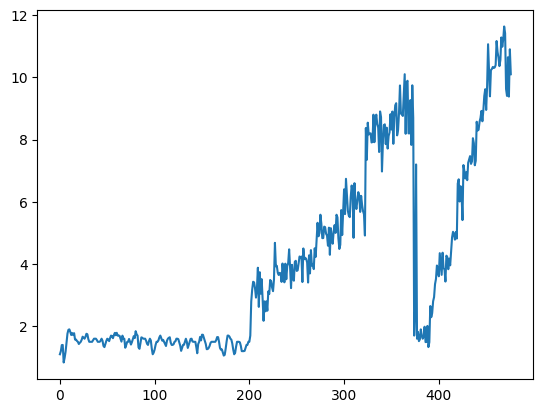

In [12]:
plt.plot(y_METS)

In [2]:
print(X.shape)
print(y_Actividades.shape)

(61334, 6, 250)
(61334,)


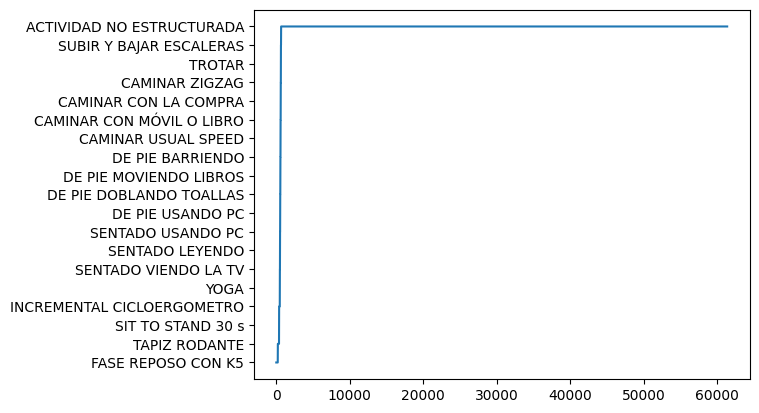

In [3]:

plt.plot(y_Actividades)

In [4]:
# Matriz X tiene para cada señal 5 cuantiles, 5 x 6 señales = 30
# Minimo, Maximo, Mediana, Percentil 25, Percentil 75

# Para cada señal se calcula la frecuencia y la potencia de los armonicos 1 y 2 y la spectral entropy, 5 x 6 = 30

# Numero de picos y prominencia media 2 x 6 = 12

# Correlaciones entre ejes  5 x 6 / 2 = 15

# Autocorrelacion del primer IMU    1

# Promedio roll, pith, yaw    3

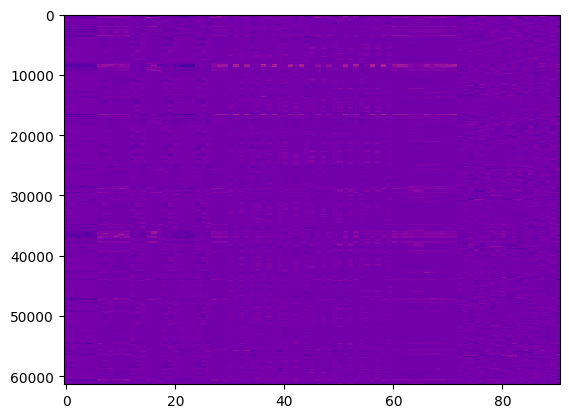

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

plt.imshow(X_norm, aspect='auto', cmap='plasma', interpolation='none')
plt.show()

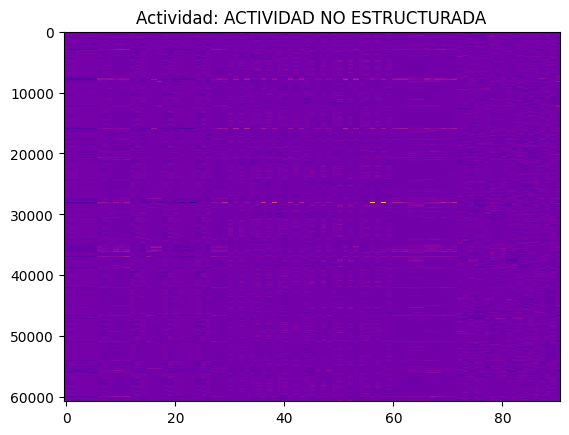

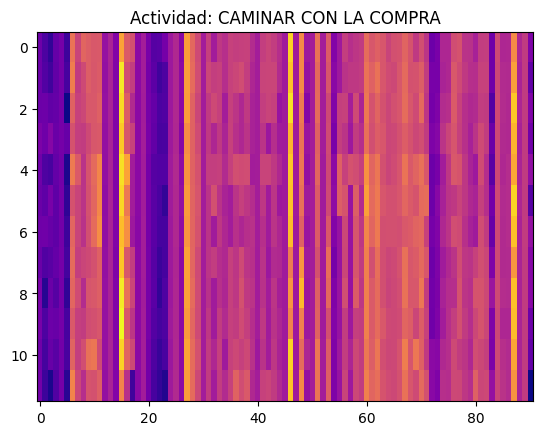

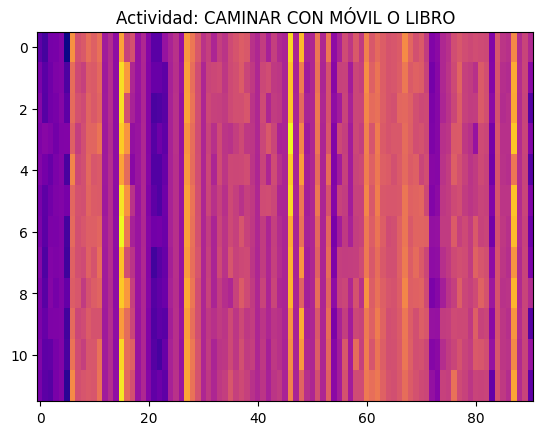

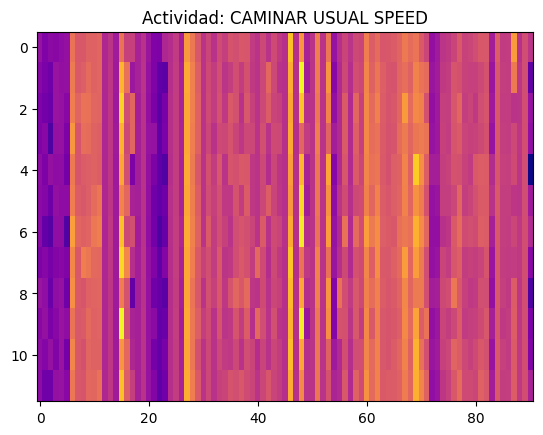

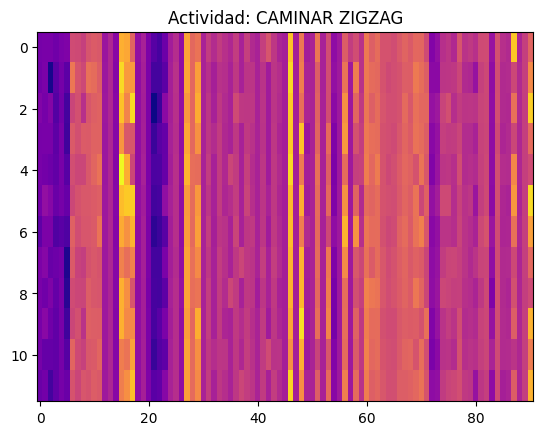

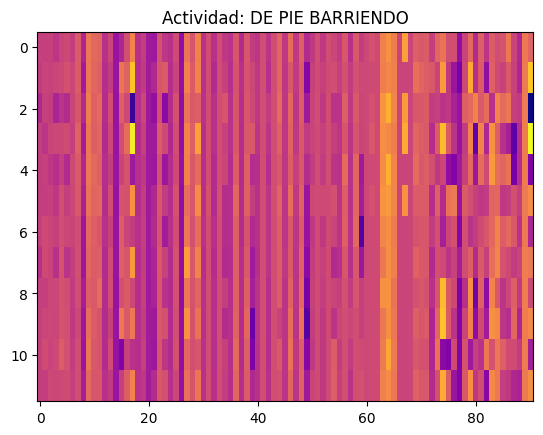

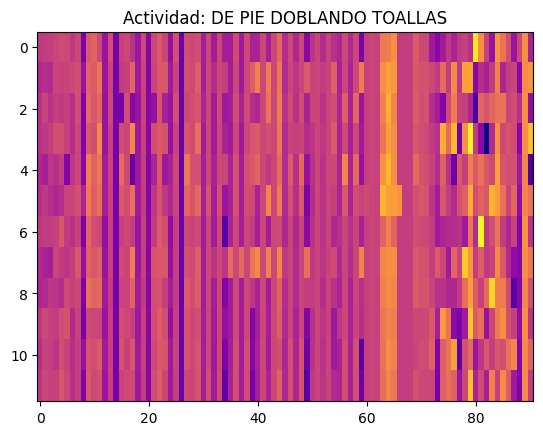

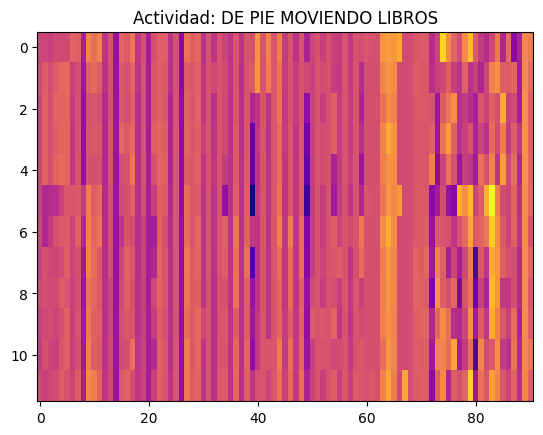

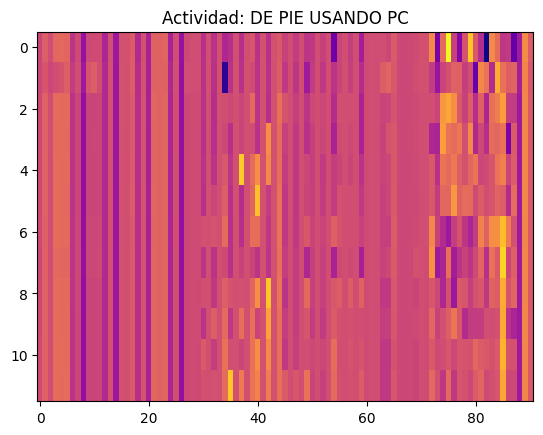

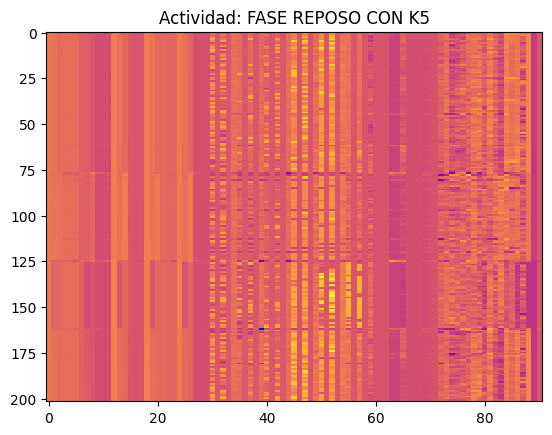

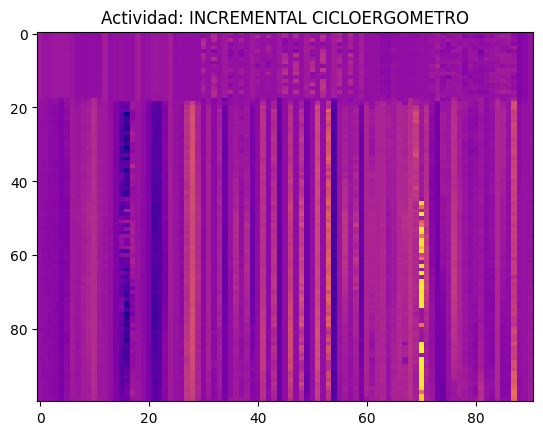

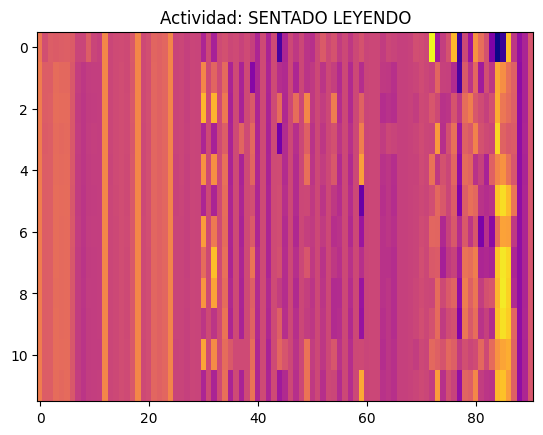

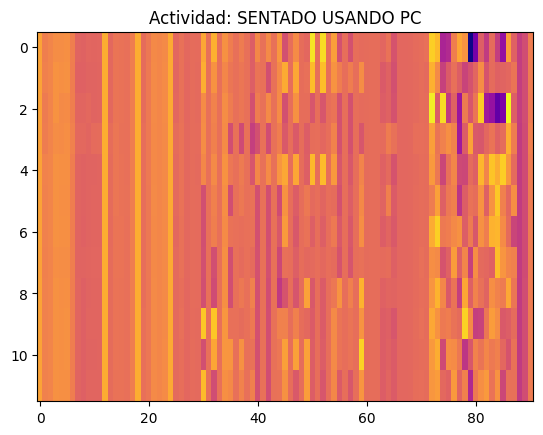

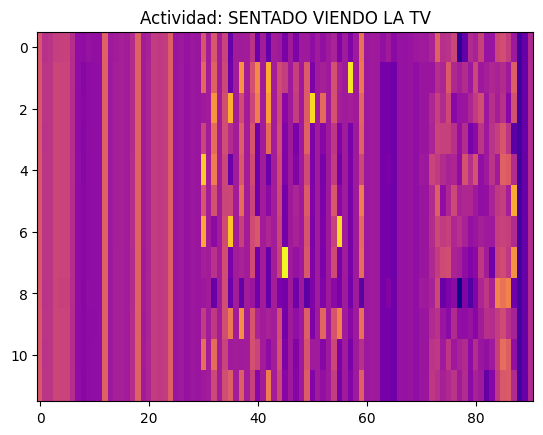

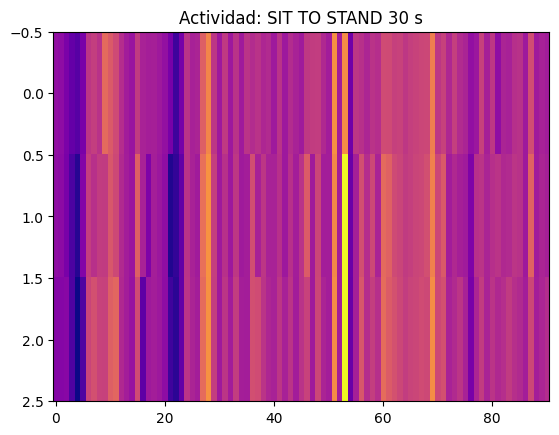

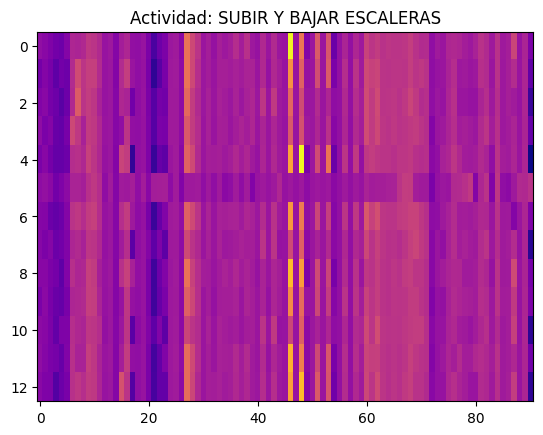

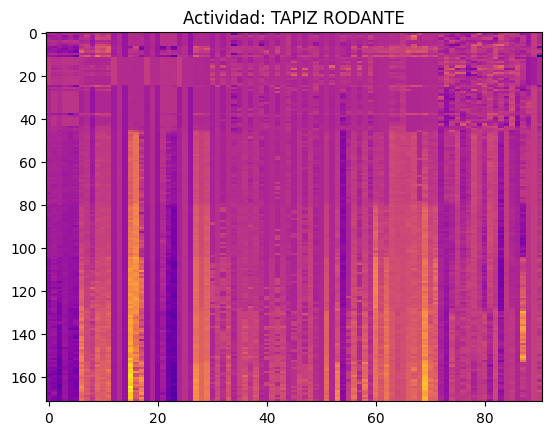

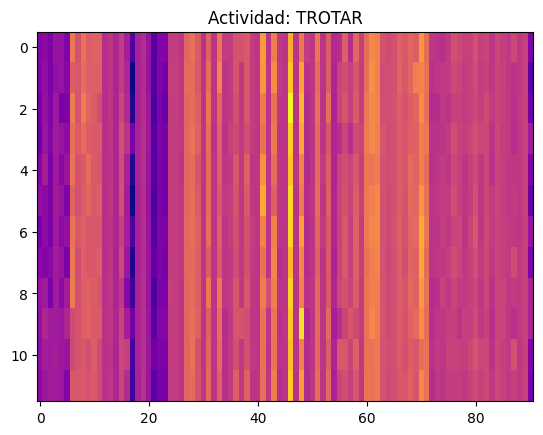

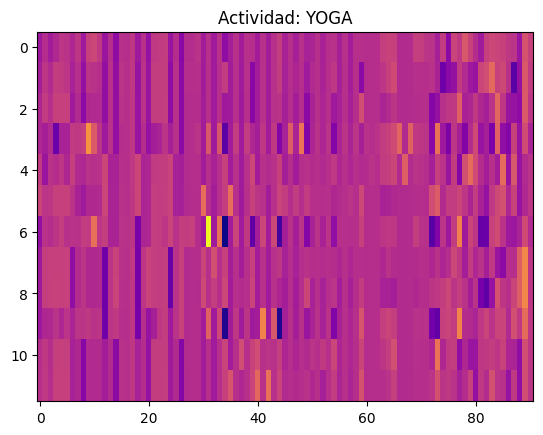

In [6]:
actividades = np.unique(y_Actividades)

for i in actividades:

    mask = y_Actividades == i
    
    plt.title(f'Actividad: {i}')
    plt.imshow(X_norm[mask,:], aspect='auto', cmap='plasma', interpolation='none')
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

random = 42

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_Actividades, test_size=0.2, random_state=random)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=random)

In [8]:
import numpy as np
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras import Input, Model, layers, regularizers
import tensorflow as tf


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()

inputs = Input(shape=(X_train.shape[1],))

capa1 = layers.Dense(1024, kernel_regularizer=regularizers.l1(0.01))(inputs)
capa1 = layers.BatchNormalization()(capa1)  
capa1 = layers.ReLU()(capa1)
capa1 = layers.Dropout(0.2)(capa1)

capa2 = layers.Dense(1024, kernel_regularizer=regularizers.l1(0.01))(capa1)
capa2 = layers.BatchNormalization()(capa2)  
capa2 = layers.ReLU()(capa2)
capa2 = layers.Dropout(0.2)(capa2)

capa2_latente = layers.Dense(2, kernel_regularizer=regularizers.l1(0.01))(capa2)

capa3 = layers.Dense(128, kernel_regularizer=regularizers.l1(0.01))(capa2_latente)
capa3 = layers.BatchNormalization()(capa3)  
capa3 = layers.ReLU()(capa3)
capa3 = layers.Dropout(0.2)(capa3)

capa4 = layers.Dense(128, kernel_regularizer=regularizers.l1(0.01))(capa3)
capa4 = layers.BatchNormalization()(capa4)  
capa4 = layers.ReLU()(capa4)
capa4 = layers.Dropout(0.2)(capa4)



outputs = layers.Dense(X_train.shape[1], activation='linear')(capa4)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

model.fit(X_train, X_train, epochs=200, batch_size=1024, verbose=1, validation_data=(X_val, X_val), callbacks=[early_stopping])


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 43708.2031 - mean_squared_error: 43423.3828 - val_loss: 42374.3438 - val_mean_squared_error: 42214.3750
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 44216.7070 - mean_squared_error: 44080.4336 - val_loss: 42928.7031 - val_mean_squared_error: 42837.7031
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 42463.1953 - mean_squared_error: 42379.4688 - val_loss: 42944.1016 - val_mean_squared_error: 42877.9922
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 41395.7539 - mean_squared_error: 41333.5000 - val_loss: 42054.5430 - val_mean_squared_error: 42001.8242
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 43901.3203 - mean_squared_error: 43850.1055 - val_loss: 41369.7852 - val_mean_squared_error: 41323.7930
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 42031.5703 - mean_squared_error: 41986.0469 - val_loss: 39840.3047 - val_mean_squared_error: 39795.8242
Epoch 7/200
38/3

In [10]:
def evaluar_capa(idx_capa, umbral_pesos=0.1, umbral_activacion=0.1):
    
    layer = model.layers[idx_capa]
    nombre = layer.name

    if not isinstance(layer, tf.keras.layers.Dense):
        print(f'>> Capa {nombre} no es Dense, se ignora.')
        return

    # 1. Pruning por pesos
    weights, biases = layer.get_weights()
    mascara_neuronas_utiles = np.sum(np.abs(weights), axis=0) > umbral_pesos
    num_utiles = np.sum(mascara_neuronas_utiles)
    total_neuronas = weights.shape[1]

    # 2. Activación promedio
    modelo_intermedio = Model(inputs=model.input, outputs=model.get_layer(nombre).output)
    activaciones = modelo_intermedio.predict(X_train, verbose=0)
    activacion_promedio = np.mean(np.abs(activaciones))
    
    print(f'Capa "{nombre}":')
    print(f'  Neuronas útiles (por pesos): {num_utiles}/{total_neuronas}')
    print(f'  Activación promedio global : {activacion_promedio:.5f}')

    # 3. Criterio de eliminación
    if (num_utiles < (total_neuronas * 0.2)) and (activacion_promedio < umbral_activacion):
        print(f'Esta capa podría eliminarse (muy poca contribución)')
    else:
        print(f'Capa retenida')


for idx in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]:  # estos son los índices de tus Dense
    evaluar_capa(idx)

Capa "dense":
  Neuronas útiles (por pesos): 973/1024
  Activación promedio global : 42.87835
Capa retenida
>> Capa batch_normalization no es Dense, se ignora.
>> Capa re_lu no es Dense, se ignora.
>> Capa dropout no es Dense, se ignora.
Capa "dense_1":
  Neuronas útiles (por pesos): 1024/1024
  Activación promedio global : 1.38348
Capa retenida
>> Capa batch_normalization_1 no es Dense, se ignora.
>> Capa re_lu_1 no es Dense, se ignora.
>> Capa dropout_1 no es Dense, se ignora.
Capa "dense_2":
  Neuronas útiles (por pesos): 2/2
  Activación promedio global : 15.08885
Capa retenida
Capa "dense_3":
  Neuronas útiles (por pesos): 121/128
  Activación promedio global : 2.44632
Capa retenida
>> Capa batch_normalization_2 no es Dense, se ignora.
>> Capa re_lu_2 no es Dense, se ignora.
>> Capa dropout_2 no es Dense, se ignora.
Capa "dense_4":
  Neuronas útiles (por pesos): 128/128
  Activación promedio global : 1.85251
Capa retenida
>> Capa batch_normalization_3 no es Dense, se ignora.
>> Ca

IndexError: list index out of range

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


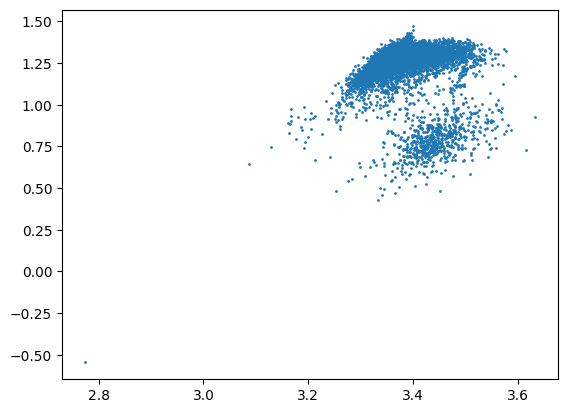

In [11]:
modelo_capa1_2 = Model(inputs=inputs, outputs=capa2_latente)

salidas_capa1_2 = modelo_capa1_2.predict(X_norm)

plt.scatter(salidas_capa1_2[:,0], salidas_capa1_2[:,1], s=1)